In [1]:
!pip list

Package           Version
----------------- -----------
asttokens         3.0.0
colorama          0.4.6
comm              0.2.2
contourpy         1.3.1
cycler            0.12.1
debugpy           1.8.12
decorator         5.2.1
executing         2.2.0
fonttools         4.56.0
ipykernel         6.29.5
ipython           8.32.0
jedi              0.19.2
jupyter_client    8.6.3
jupyter_core      5.7.2
kiwisolver        1.4.8
matplotlib        3.10.0
matplotlib-inline 0.1.7
nest-asyncio      1.6.0
numpy             2.2.3
opencv-python     4.11.0.86
packaging         24.2
parso             0.8.4
pillow            11.1.0
pip               24.3.1
platformdirs      4.3.6
prompt_toolkit    3.0.50
psutil            7.0.0
pure_eval         0.2.3
Pygments          2.19.1
pyparsing         3.2.1
python-dateutil   2.9.0.post0
pywin32           308
pyzmq             26.2.1
setuptools        75.8.0
six               1.17.0
stack-data        0.6.3
tornado           6.4.2
traitlets         5.14.3
typing_ext

In [2]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.5 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Reading and Displaying Images

In [2]:
%matplotlib inline

In [7]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [22]:
img_mpl = mpimg.imread(r"..\codes\images\low_light_rail_track_images\rail_track_night_time_1.png")

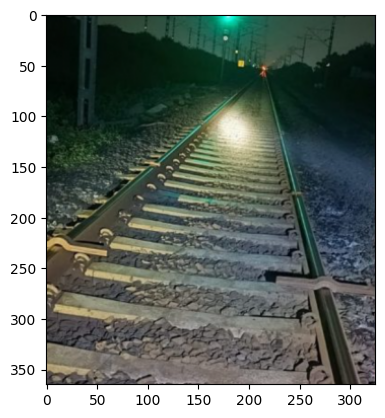

In [23]:
plt.imshow(img_mpl)
plt.show()

In [25]:
img_cv = cv2.imread(r"..\codes\images\low_light_rail_track_images\rail_track_night_time_1.png")

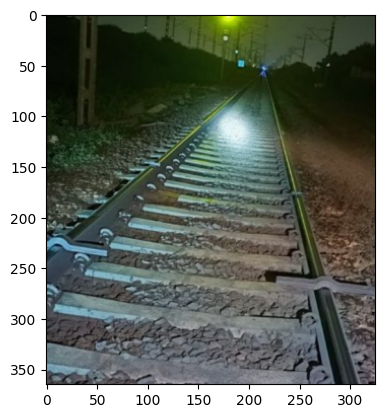

In [33]:
plt.imshow(img_cv)
plt.show()

In [45]:
def img_show(window_name, img):
    cv2.imshow(window_name, img)
    k = cv2.waitKey(0)
    if k == ord('q'):
        cv2.destroyAllWindows()

In [46]:
img_show("BGR Image", img_cv)

In [19]:
from PIL import Image

In [20]:
from IPython.display import display

In [21]:
img_pil = Image.open(r"..\codes\images\low_light_rail_track_images\rail_track_night_time_1.png")

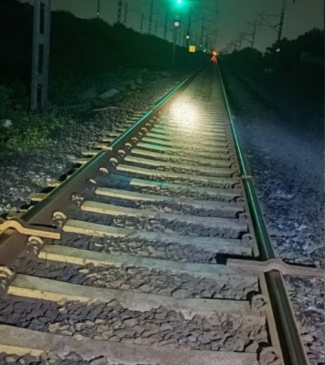

In [24]:
display(img_pil)

### Improving Image Clarity

#### Histogram Equalization for Gray Scale Images

##### Histogram Equalization (HE) is a technique used to enhance image contrast by redistributing pixel intensity values more evenly across the entire range (0-255 for an 8-bit image). This improves visibility in images with poor contrast, such as underexposed or overexposed images.

- How Histogram Equalization Works : 
    - Counts how many times each brightness level appears in the image.

    - This creates a histogram (a chart showing pixel intensity distribution). Figures out the overall brightness pattern using CDF.

    - The Cumulative Distribution Function (CDF) helps understand how brightness is spread. Stretches the brightness levels across the full range (0 to 255).

    - This makes dark areas brighter and bright areas darker, balancing contrast. Replaces old brightness values with new ones.

In [48]:
gray_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

In [49]:
img_show("Grayscale Image", gray_img)

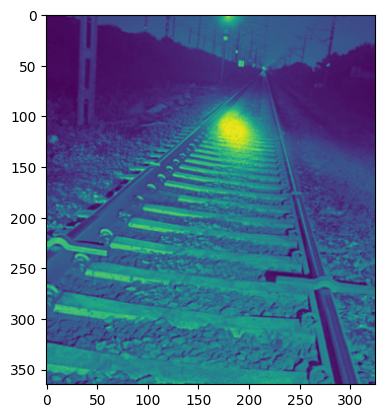

In [32]:
plt.imshow(gray_img)

In [50]:
enhanced_img = cv2.equalizeHist(gray_img)

In [51]:
img_show("HE Enhanced Grayscale Image", enhanced_img)

#### Histogram Equalization for Color (YCrCb) Images

- Since HE is designed for grayscale images, If you want to apply it on color images, apply HE in a perceptual color space like YCrCb or LAB, where only the luminance (brightness) component is adjusted.

- YCrCb is a color space used in image processing and video compression. It separates an image into luminance (Y) and chrominance (Cr, Cb) components, making it useful for tasks like color correction, histogram equalization, and compression.

- Apply HE only on the Y (luminance) channel in the YCrCb color space, preserving color information.

- Components of YCrCb:
    - Y (Luminance) – Represents the brightness (intensity) of the image.
    - Cr (Chrominance-Red) – Represents the difference between the Red channel and Luminance (R - Y).
    - Cb (Chrominance-Blue) – Represents the difference between the Blue channel and Luminance (B - Y).

In [53]:
img_ycrcb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2YCrCb)

y, cr, cb = cv2.split(img_ycrcb)

img_show("Luminance (Y)", y)
img_show("Chrominance Cr", cr)
img_show("Chrominance Cb", cb)

In [54]:
merged_ycrcb = cv2.merge((y, cr, cb))
bgr_image = cv2.cvtColor(merged_ycrcb, cv2.COLOR_YCrCb2BGR)
img_show("BGR from YCrCb", bgr_image)

In [55]:
# Apply HE on the luminance channel (Y)
y_eq = cv2.equalizeHist(y)

# Merge YCrCb channels back
img_ycrcb_eq = cv2.merge((y_eq, cr, cb))

equalized_BGR_image = cv2.cvtColor(img_ycrcb_eq, cv2.COLOR_YCrCb2BGR)

img_show("HE Enhanced Color Image", equalized_BGR_image)


##### HE may over-enhance noise in some images. To prevent this, CLAHE (Contrast Limited Adaptive Histogram Equalization) is used.

#### Contrast Limited Adaptive Histogram Equalization

- CLAHE is an improved version of Histogram Equalization (HE) that enhances contrast in images while preventing over-amplification of noise. Unlike global histogram equalization, which applies the same transformation to the entire image, CLAHE works locally by dividing the image into small regions (tiles) and equalizing their histograms separately.

- How CLAHE Works : 
    - Splits the image into small sections (tiles).

    - Instead of adjusting the entire image at once, it works on small parts separately. Enhances contrast in each section using histogram equalization.

    - This makes dark areas brighter and bright areas darker for better visibility. Prevents over-enhancement with a clip limit.

    - It avoids making some areas too bright or too dark, which can cause noise. Smoothly blends the sections together.

    - This ensures there are no sharp edges between the enhanced sections.

#### What is LAB Color Space?
- LAB is a color space that separates an image into three components:

    - L (Lightness): Represents brightness (from black to white).
    - A (Green-Red Axis): Represents color variations from green to red.
    - B (Blue-Yellow Axis): Represents color variations from blue to yellow.

- Better for Contrast Enhancement: Since L (Lightness) is separate from color, applying Histogram Equalization or CLAHE to L improves contrast without distorting colors.

In [59]:
# Convert BGR to LAB
lab_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2LAB)

# Split into L, A, and B channels
l, a, b = cv2.split(lab_img)

# Show the Lightness channel
img_show("Lightness (L)", l)
img_show("A Channel", a)
img_show("B Channel", b)

In [61]:
# Apply CLAHE only to the L channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)

# Merge back and convert to BGR
lab_clahe = cv2.merge((l_clahe, a, b))
enhanced_image_BGR_from_LAB = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

img_show("Enhanced Image from LAB to BGR", enhanced_image_BGR_from_LAB)


##### clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

- clipLimit (Default = 40.0)
    - Limits how much contrast is enhanced in each tile.
    - Prevents over-enhancement and excessive noise amplification.
    - A lower value (e.g., 2.0) ensures a more natural enhancement without too much brightness or noise.
    - A higher value (e.g., 40.0) results in a more aggressive contrast boost but may introduce noise.
    - 1.0 - 3.0 → Gentle enhancement, less noise.
    - 3.0 - 10.0 → Balanced enhancement.
    - 10.0+ → Strong contrast, but may introduce artifacts.

- tileGridSize (Default = (8,8))

    - Splits the image into small non-overlapping tiles of size (M, N).
    - Each tile is processed separately to improve local contrast.
    - The image is divided into 8×8=64 tiles, allowing local contrast improvement.
    - Smaller tiles (e.g., (4,4)) can improve very small details but may create artifacts.
    - Larger tiles (e.g., (16,16)) work better for smoother images but may miss fine details.
    - (4,4) to (8,8) → Best for fine details and small objects.
    - (8,8) to (16,16) → Good for balanced contrast enhancement.
    - (16,16) or larger → Suitable for low-resolution images but may cause over-smoothing.

# **Color Models in Image Processing**

A **color model** is a mathematical representation of colors using numerical values. Different models are used for various applications, such as digital displays, printing, and image processing.

---

## **1. RGB (Red, Green, Blue)**  
### **Used In:**  
- Digital screens (monitors, TVs, cameras).  

### **How It Works:**  
- Colors are formed by combining different intensities of red, green, and blue light.  
- `(0, 0, 0)` represents black, and `(255, 255, 255)` represents white.  

### **Why Use RGB?**  
- Suitable for **digital images and displays**.  
- Widely used in **image processing and computer vision**.  

---

## **2. CMYK (Cyan, Magenta, Yellow, Black)**  
### **Used In:**  
- Printers and other paper-based media.  

### **How It Works:**  
- Uses **Cyan, Magenta, Yellow, and Black** inks.  
- Works on a **subtractive color model**, meaning it starts with white and absorbs light to create colors.  

### **Why Use CMYK?**  
- Essential for **accurate color reproduction in printing**.  
- Converts RGB images into a format suitable for printing.  

---

## **3. HSV (Hue, Saturation, Value)**  
### **Used In:**  
- Image editing, object detection, and color filtering.  

### **How It Works:**  
- **Hue (H):** Represents color type (0°-360°; Red = 0, Green = 120, Blue = 240).  
- **Saturation (S):** Defines color intensity (0-100%).  
- **Value (V):** Determines brightness (0-100%).  

### **Why Use HSV?**  
- Easier to **detect and modify specific colors** compared to RGB.  
- Used in **color-based object tracking and segmentation**.  

---

## **4. YCrCb (Luminance + Chrominance)**  
### **Used In:**  
- Digital video compression (JPEG, MPEG, broadcast TV).  

### **How It Works:**  
- **Y (Luminance):** Represents brightness (grayscale information).  
- **Cr (Chrominance-Red):** Contains red color difference.  
- **Cb (Chrominance-Blue):** Contains blue color difference.  

### **Why Use YCrCb?**  
- Commonly used in **video encoding and image compression**.  
- Helps in **contrast enhancement by modifying the Y channel**.  

---

## **5. LAB (Luminance + Color Opponents)**  
### **Used In:**  
- High-end image editing and color correction.  

### **How It Works:**  
- **L (Lightness):** Represents brightness levels.  
- **A (Green-Red Axis):** Indicates color variation from green to red.  
- **B (Blue-Yellow Axis):** Indicates color variation from blue to yellow.  

### **Why Use LAB?**  
- Used for **contrast enhancement without distorting colors**.  
- Common in **photo editing and medical imaging applications**.  

---

## **Comparison of Color Models**  

| Color Model | Used For | Strengths | Common Applications |
|------------|---------|-----------|---------------------|
| **RGB** | Digital screens | Best for digital images | Image processing, computer vision |
| **CMYK** | Printing | Accurate for physical media | Paper printing |
| **HSV** | Color filtering | Easy to detect and change colors | Object tracking, segmentation |
| **YCrCb** | Video compression | Separates brightness and color | JPEG, MPEG, video processing |
| **LAB** | Color correction | Best for enhancing contrast | Photoshop, medical imaging |

---

## **Choosing the Right Color Model**  
- **For Display and Image Processing:** RGB  
- **For Printing:** CMYK  
- **For Color Filtering and Detection:** HSV  
- **For Video and Compression:** YCrCb  
- **For High-Quality Color Editing:** LAB  

Each color model has its own advantages and is used depending on the application. In image processing, conversions between these models are common to extract meaningful information.